In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:

oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
sample = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv')
holidays = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')


In [3]:
print('Oil Prices\n',oil)
print('Sample\n',sample.head())
print('Holiday\n',holidays.head())
print('Stores\n',stores.head())
print('transactions\n',transactions.head())
train.head()

Oil Prices
             date  dcoilwtico
0     2013-01-01         NaN
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
...          ...         ...
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

[1218 rows x 2 columns]
Sample
         id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0
Holiday
          date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred 

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


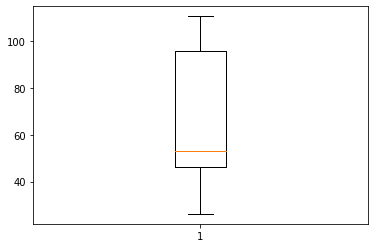

In [4]:
import matplotlib.pyplot as plt
price = oil['dcoilwtico'].dropna()
plt.boxplot(price)
plt.show()

In [5]:
training1 = pd.merge(train, oil, how = 'left', on='date')
training1 = pd.merge(training1, holidays, how = 'left',on = 'date')
training1 = pd.merge(training1, transactions, how ='left', on =['date','store_nbr'])
training1 = pd.merge(training1, stores, how = 'left', on = 'store_nbr')
training1.rename(columns={'type_x':'holiday_type', 'type_y':'store_type'}, inplace = True)
training1.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,transactions,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [6]:
def str_to_num(data):
    data1 = data.dropna().unique()
    lis = range(1,len(data1)+1)
    zipper = dict(zip(data1,lis))
    print(zipper)
    liss = []
    for ele in data:
        x = zipper[ele]
        liss.append(x)
    return liss
holidays['type'] = str_to_num(holidays['type'])
holidays.head()

{'Holiday': 1, 'Transfer': 2, 'Additional': 3, 'Bridge': 4, 'Work Day': 5, 'Event': 6}


,date,type,locale,locale_name,description,transferred
0,2012-03-02,1,Local,Manta,Fundacion de Manta,False
1,2012-04-01,1,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,1,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,1,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,1,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
stores['type'] = str_to_num(stores['type'])
train['family'] = str_to_num(train['family'])
stores['city'] = str_to_num(stores['city'])
holidays['locale'] = str_to_num(holidays['locale'])
holidays['locale_name'] = str_to_num(holidays['locale_name'])
holidays['transferred'] = str_to_num(holidays['transferred'])

{'D': 1, 'B': 2, 'C': 3, 'E': 4, 'A': 5}
{'AUTOMOTIVE': 1, 'BABY CARE': 2, 'BEAUTY': 3, 'BEVERAGES': 4, 'BOOKS': 5, 'BREAD/BAKERY': 6, 'CELEBRATION': 7, 'CLEANING': 8, 'DAIRY': 9, 'DELI': 10, 'EGGS': 11, 'FROZEN FOODS': 12, 'GROCERY I': 13, 'GROCERY II': 14, 'HARDWARE': 15, 'HOME AND KITCHEN I': 16, 'HOME AND KITCHEN II': 17, 'HOME APPLIANCES': 18, 'HOME CARE': 19, 'LADIESWEAR': 20, 'LAWN AND GARDEN': 21, 'LINGERIE': 22, 'LIQUOR,WINE,BEER': 23, 'MAGAZINES': 24, 'MEATS': 25, 'PERSONAL CARE': 26, 'PET SUPPLIES': 27, 'PLAYERS AND ELECTRONICS': 28, 'POULTRY': 29, 'PREPARED FOODS': 30, 'PRODUCE': 31, 'SCHOOL AND OFFICE SUPPLIES': 32, 'SEAFOOD': 33}
{'Quito': 1, 'Santo Domingo': 2, 'Cayambe': 3, 'Latacunga': 4, 'Riobamba': 5, 'Ibarra': 6, 'Guaranda': 7, 'Puyo': 8, 'Ambato': 9, 'Guayaquil': 10, 'Salinas': 11, 'Daule': 12, 'Babahoyo': 13, 'Quevedo': 14, 'Playas': 15, 'Libertad': 16, 'Cuenca': 17, 'Loja': 18, 'Machala': 19, 'Esmeraldas': 20, 'Manta': 21, 'El Carmen': 22}
{'Local': 1, 'Regional'

In [8]:
import numpy as np
from sklearn.impute import KNNImputer
import pandas as pd
X = oil['dcoilwtico'].values.reshape((203,6))
imputer = KNNImputer(n_neighbors=5, weights = 'distance')
z = imputer.fit_transform(X)
z = z.reshape((1218,1))
oil['dcoilwtico'] = z
training = pd.merge(train, oil, how = 'left', on='date')
training = pd.merge(training, holidays, how = 'left',on = 'date')
training = pd.merge(training, transactions, how ='left', on =['date','store_nbr'])
training = pd.merge(training, stores, how = 'left', on = 'store_nbr')
training.rename(columns={'type_x':'holiday_type', 'type_y':'store_type'}, inplace = True)
training.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,transactions,city,state,store_type,cluster
0,0,2013-01-01,1,1,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
1,1,2013-01-01,1,2,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
2,2,2013-01-01,1,3,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
3,3,2013-01-01,1,4,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
4,4,2013-01-01,1,5,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13


In [9]:
print(training.shape)
training.isnull().sum()

(3054348, 17)


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       878526
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions     249117
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

In [10]:
training[['holiday_type']] = training[['holiday_type']].fillna(0)
training['transactions']=training['transactions'].fillna(0)
training['dcoilwtico']=training['dcoilwtico'].fillna(method='bfill')
training['locale_name']= training['locale_name'].fillna(0)
training.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,transactions,city,state,store_type,cluster
0,0,2013-01-01,1,1,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
1,1,2013-01-01,1,2,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
2,2,2013-01-01,1,3,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
3,3,2013-01-01,1,4,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
4,4,2013-01-01,1,5,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13


In [11]:
training['locale']=training['locale'].fillna(0)
training['transferred']=training['transferred'].fillna(0)
training.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
holiday_type          0
locale                0
locale_name           0
description     2551824
transferred           0
transactions          0
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

In [12]:
training.describe()


,id,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,transferred,transactions,city,store_type,cluster
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,1.700000e+01,3.590209e+02,2.617480e+00,6.780550e+01,3.943991e-01,3.465578e-01,2.250875e+00,1.697783e-01,1.558656e+03,7.981481e+00,2.592593e+00,8.481481e+00
std,8.662610e+05,1.558579e+01,9.521906e+00,1.107286e+03,1.225494e+01,2.568740e+01,1.200784e+00,8.729519e-01,5.485748e+00,3.891727e-01,1.036468e+03,6.881244e+00,1.433960e+00,4.649735e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.546768e+05,1.400000e+01,9.000000e+00,0.000000e+00,0.000000e+00,4.628000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.310000e+02,1.000000e+00,1.000000e+00,4.000000e+00
50%,1.507572e+06,2.750000e+01,1.700000e+01,1.100000e+01,0.000000e+00,5.308500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.332000e+03,7.500000e+00,3.000000e+00,8.500000e+00
75%,2.255120e+06,4.100000e+01,2.500000e+01,1.960110e+02,0.000000e+00,9.572000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.980000e+03,1.300000e+01,3.000000e+00,1.300000e+01
max,3.000887e+06,5.400000e+01,3.300000e+01,1.247170e+05,7.410000e+02,1.106200e+02,6.000000e+00,3.000000e+00,2.400000e+01,2.000000e+00,8.359000e+03,2.200000e+01,5.000000e+00,1.700000e+01


Text(0.5, 0, 'store number')

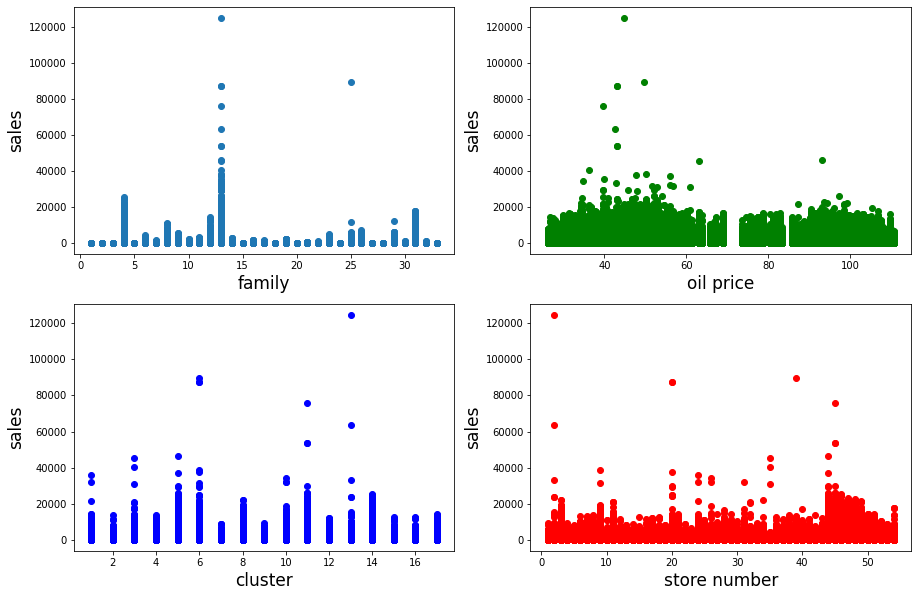

In [13]:
import matplotlib.pyplot as plt
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(15,10), sharex=False)
ax0.set_ylabel('sales', fontsize=17)
ax1.set_ylabel('sales', fontsize=17)
ax2.set_ylabel('sales', fontsize=17)
ax3.set_ylabel('sales', fontsize=17)
ax0.scatter(training['family'],training['sales'])
ax1.scatter(training['dcoilwtico'],training['sales'], color='green')
ax2.scatter(training['cluster'],training['sales'], color='blue')
ax3.scatter(training['store_nbr'],training['sales'], color='red')
ax0.set_xlabel('family', fontsize=17)
ax1.set_xlabel('oil price',fontsize=17)
ax2.set_xlabel('cluster',fontsize=17)
ax3.set_xlabel('store number',fontsize=17)


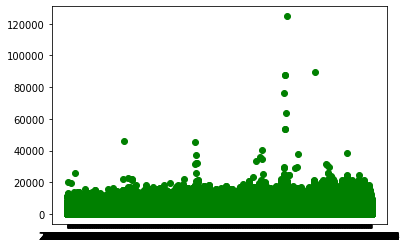

In [14]:
plt.scatter(training['date'],training['sales'], color='green')

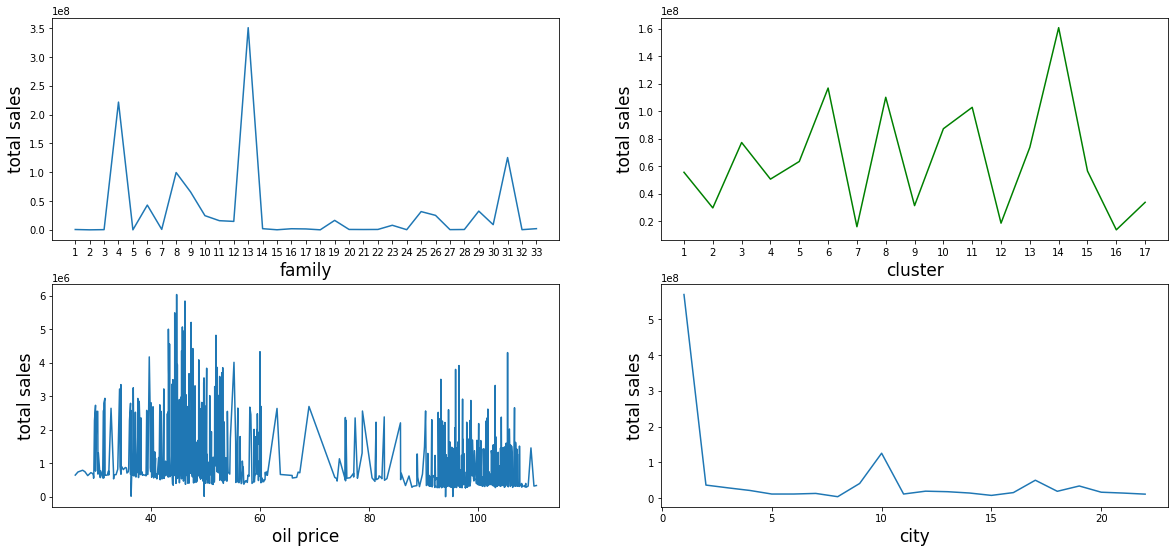

In [15]:
famsum = training[['sales','family']].groupby('family').sum()
oilsum = training[['sales','dcoilwtico']].groupby('dcoilwtico').sum()
oil1 = sorted(training['dcoilwtico'].unique())
family = sorted(training['family'].unique())
clussum = training[['sales','cluster']].groupby('cluster').sum()
cluster = sorted(training['cluster'].unique())
citsum = training[['sales','city']].groupby('city').sum()
cities = sorted(training['city'].unique())
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,sharex=False, sharey=False, figsize=(20,9))
ax0.set_xticks(family)
ax1.set_xticks(cluster)
ax0.set_xlabel('family', fontsize=17)
ax1.set_xlabel('cluster', fontsize=17)
ax1.set_ylabel('total sales', fontsize=17)
ax0.set_ylabel('total sales', fontsize=17)
ax0.plot(family,famsum)
ax1.plot(cluster,clussum, color='green')
ax2.set_ylabel('total sales', fontsize=17)
ax2.set_xlabel('oil price', fontsize=17)
ax2.plot(oil1,oilsum)
ax3.set_ylabel('total sales', fontsize=17)
ax3.set_xlabel('city', fontsize=17)
ax3.plot(cities,citsum)


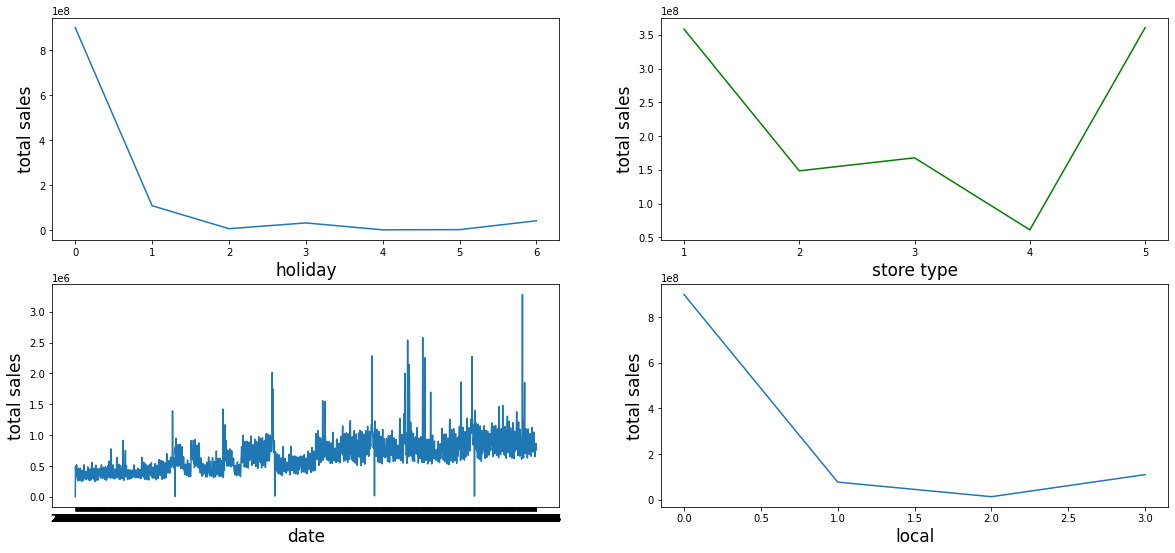

In [16]:
training['date']=training['date'].str.replace('-','')
famsum = training[['sales','holiday_type']].groupby('holiday_type').sum()
oilsum = training[['sales','date']].groupby('date').sum()
oil1 = sorted(training['date'].unique())
family = sorted(training['holiday_type'].unique())
clussum = training[['sales','store_type']].groupby('store_type').sum()
cluster = sorted(training['store_type'].unique())
loc = sorted(training['locale'].unique())
locsum = training[['sales','locale']].groupby('locale').sum()
oil1 = sorted(training['date'].unique())
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,sharex=False, sharey=False, figsize=(20,9))
ax0.set_xticks(family)
ax1.set_xticks(cluster)
ax0.set_xlabel('holiday', fontsize=17)
ax1.set_xlabel('store type', fontsize=17)
ax1.set_ylabel('total sales', fontsize=17)
ax0.set_ylabel('total sales', fontsize=17)
ax0.plot(family,famsum)
ax1.plot(cluster,clussum, color='green')
ax2.set_ylabel('total sales', fontsize=17)
ax2.set_xlabel('date', fontsize=17)
ax2.plot(oil1,oilsum)
ax3.set_ylabel('total sales', fontsize=17)
ax3.set_xlabel('local', fontsize=17)
ax3.plot(loc,locsum)

In [17]:
training.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,transactions,city,state,store_type,cluster
0,0,20130101,1,1,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
1,1,20130101,1,2,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
2,2,20130101,1,3,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
3,3,20130101,1,4,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
4,4,20130101,1,5,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13


In [18]:
# From the above plots we see that the holiday type and locale has almost
# the same impact on the sales. So, using one would be fine. And using city
# instead of state would be more general.
#We will also ignore the transferred column to prevent power consumption due to more 
# features assuming holiday that has been transferred won't impact the sales as much.

In [19]:
training1 = training[training['sales']<80000]

X = training1[['id', 'date','store_nbr', 'family', 'onpromotion',
              'dcoilwtico', 'holiday_type','locale_name','cluster',
              'transactions', 'store_type', 'city']]
Y = training1[['sales']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 12, random_state=1)
rr = RFR.fit(X_train,y_train)
rr.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == "":


0.957142272428658

In [20]:
# r2 score of 0.947 with too many features
# lets see each feature's contribution

feat_labels = training1[['id', 'date','store_nbr', 'family', 'onpromotion',
              'dcoilwtico', 'holiday_type','locale_name','cluster',
              'transactions', 'store_type', 'city']]
for feature in zip(feat_labels, rr.feature_importances_):
    print(feature)

('id', 0.05020437354043472)
('date', 0.017993268567021742)
('store_nbr', 0.020666668099790175)
('family', 0.3682867973569419)
('onpromotion', 0.2509637006137006)
('dcoilwtico', 0.010946597243920629)
('holiday_type', 0.0015561062028313151)
('locale_name', 0.0016639271996605326)
('cluster', 0.01675129326627141)
('transactions', 0.2450161572393764)
('store_type', 0.009850563551682335)
('city', 0.006100547118368219)


In [21]:
training[training['sales']>35000].count()

id              15
date            15
store_nbr       15
family          15
sales           15
onpromotion     15
dcoilwtico      15
holiday_type    15
locale          15
locale_name     15
description     10
transferred     15
transactions    15
city            15
state           15
store_type      15
cluster         15
dtype: int64

In [22]:
# selecting features on the basis of contribution to the prediction
training2 = training[training['sales']<40000]
x = training2[['id', 'date','store_nbr', 'family', 'onpromotion',
        'transactions','cluster']]
Y=training2['sales']
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 9)
rr1 = RFR.fit(X_train,y_train)
rr1.score(X_test, y_test)

0.9627671160335209

In [23]:
rr1 = RFR.fit(x,Y)         #add more training data to reduce the variance

In [24]:
# r2 score of 0.96

feat = training2[['id', 'date','store_nbr', 'family', 'onpromotion',
        'transactions','cluster']]
for feature in zip(feat, rr1.feature_importances_):
    print(feature)

('id', 0.06285695436516635)
('date', 0.01550861519700022)
('store_nbr', 0.03054493179182763)
('family', 0.37125667472135987)
('onpromotion', 0.24928662210934271)
('transactions', 0.2488729950608916)
('cluster', 0.021673206754411697)


In [25]:
#lets try to further reduce the feature set

# x1 = training[['id', 'family', 'onpromotion','transactions']]
# X_train,X_test,y_train,y_test = train_test_split(x1,Y,test_size = 0.2)
# from sklearn.ensemble import RandomForestRegressor
# RFR = RandomForestRegressor(n_estimators = 8)
# rr2 = RFR.fit(X_train,y_train)
# rr2.score(X_test, y_test)

In [26]:
testing = pd.merge(test, oil, on='date', how='left')
testing = pd.merge(testing, holidays, on='date', how='left')
testing = pd.merge(testing, stores, on='store_nbr', how='left')
testing = pd.merge(testing, transactions, on=['store_nbr', 'date'], how='left')
testing.rename(columns={'type_x':'holiday_type', 'type_y':'store_type'}, inplace=True)
testing['family'] = str_to_num(testing['family'])
testing['holiday_type'] = testing['holiday_type'].fillna(0)
testing['locale_name'] = testing['locale_name'].fillna(0)
testing['locale']=testing['locale'].fillna(0)
testing['transactions']=testing['transactions'].fillna(0)
X = testing['dcoilwtico'].values.reshape((9504,3))
imputer = KNNImputer(n_neighbors=5, weights = 'distance')
z = imputer.fit_transform(X)
z=z.reshape((28512,1))
testing['dcoilwtico']=z
print('test/n',testing.isnull().sum())
testing.head()

{'AUTOMOTIVE': 1, 'BABY CARE': 2, 'BEAUTY': 3, 'BEVERAGES': 4, 'BOOKS': 5, 'BREAD/BAKERY': 6, 'CELEBRATION': 7, 'CLEANING': 8, 'DAIRY': 9, 'DELI': 10, 'EGGS': 11, 'FROZEN FOODS': 12, 'GROCERY I': 13, 'GROCERY II': 14, 'HARDWARE': 15, 'HOME AND KITCHEN I': 16, 'HOME AND KITCHEN II': 17, 'HOME APPLIANCES': 18, 'HOME CARE': 19, 'LADIESWEAR': 20, 'LAWN AND GARDEN': 21, 'LINGERIE': 22, 'LIQUOR,WINE,BEER': 23, 'MAGAZINES': 24, 'MEATS': 25, 'PERSONAL CARE': 26, 'PET SUPPLIES': 27, 'PLAYERS AND ELECTRONICS': 28, 'POULTRY': 29, 'PREPARED FOODS': 30, 'PRODUCE': 31, 'SCHOOL AND OFFICE SUPPLIES': 32, 'SEAFOOD': 33}
test/n id                  0
date                0
store_nbr           0
family              0
onpromotion         0
dcoilwtico          0
holiday_type        0
locale              0
locale_name         0
description     26730
transferred     26730
city                0
state               0
store_type          0
cluster             0
transactions        0
dtype: int64


,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,3000888,2017-08-16,1,1,0,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
1,3000889,2017-08-16,1,2,0,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
2,3000890,2017-08-16,1,3,2,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
3,3000891,2017-08-16,1,4,20,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
4,3000892,2017-08-16,1,5,0,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0


In [27]:
testing['date']=testing['date'].str.replace('-','')
x = testing[['id', 'date','store_nbr', 'family', 'onpromotion',
        'transactions','cluster']]       
yhat = rr1.predict(x)
yhat

array([   0.        ,    0.        ,    2.44444444, ..., 1406.04677778,
         56.55555556,    3.96      ])

In [28]:
submission = testing[['id']]
submission

,id
0,3000888
1,3000889
2,3000890
3,3000891
4,3000892
...,...
28507,3029395
28508,3029396
28509,3029397
28510,3029398


In [29]:
submission['sales'] = yhat
submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,sales
0,3000888,0.000000
1,3000889,0.000000
2,3000890,2.444444
3,3000891,6969.555556
4,3000892,0.000000
...,...,...
28507,3029395,100.466555
28508,3029396,0.222222
28509,3029397,1406.046778
28510,3029398,56.555556


In [30]:
submission.to_csv('submission.csv', index=False)